In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

In [7]:
iris = pd.read_csv('iris.csv')
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
iris[iris.duplicated()].shape

(0, 6)

In [28]:
iris.drop(['Unnamed: 0'], axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


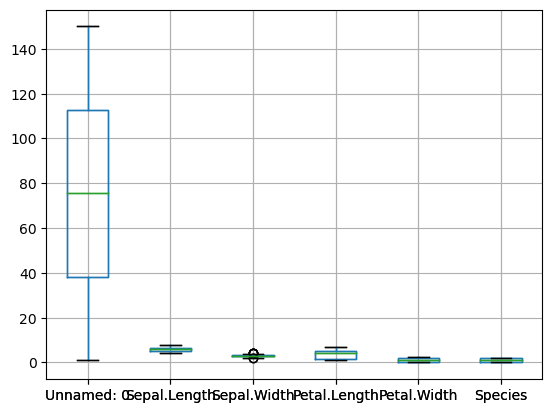

In [40]:
iris.boxplot()
plt.show()

In [43]:
cols = iris.columns
def treat_outlier(iris, cols):
    for col in cols:
        Q1 = iris[col].quantile(0.25)
        Q3 = iris[col].quantile(0.75)
        IQR = Q3 - Q1
        
        upper = Q3 + 1.5*IQR
        lower = Q1 - 1.5*IQR
        
        iris[col]=np.where(iris[col]>upper,upper,np.where(iris[col]<lower,lower,iris[col]))

In [45]:
treat_outlier(iris,iris.columns)

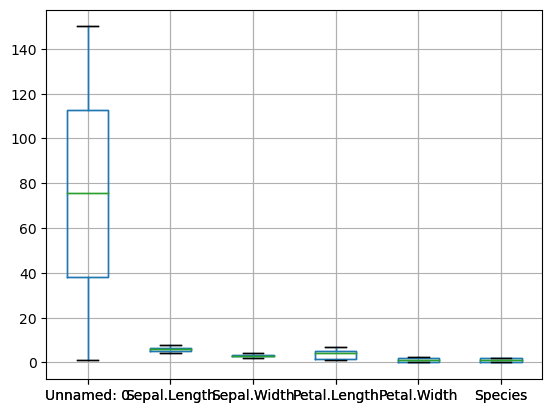

In [47]:
iris.boxplot()
plt.show()

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])

In [49]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X = iris.iloc[:,1:5]
Y = pd.Series(iris.Species)
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [52]:
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1.0,5.1,3.5,1.4,0.2,0
1,2.0,4.9,3.0,1.4,0.2,0
2,3.0,4.7,3.2,1.3,0.2,0
3,4.0,4.6,3.1,1.5,0.2,0
4,5.0,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146.0,6.7,3.0,5.2,2.3,2
146,147.0,6.3,2.5,5.0,1.9,2
147,148.0,6.5,3.0,5.2,2.0,2
148,149.0,6.2,3.4,5.4,2.3,2


In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [57]:
x_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
60,5.0,2.05,3.5,1.0
116,6.5,3.00,5.5,1.8
144,6.7,3.30,5.7,2.5
119,6.0,2.20,5.0,1.5
108,6.7,2.50,5.8,1.8
...,...,...,...,...
9,4.9,3.10,1.5,0.1
103,6.3,2.90,5.6,1.8
67,5.8,2.70,4.1,1.0
117,7.7,3.80,6.7,2.2


In [58]:
y_train

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 105, dtype: int64

In [62]:
model = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [65]:
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
83     1
61     1
92     1
112    2
2      0
141    2
43     0
10     0
Name: Species, dtype: int64

In [66]:
pd.crosstab(y_pred,y_test)

Species,0,1,2
row_0,,,
0,16,0,0
1,0,17,0
2,0,1,11


In [68]:
model.score(x_tran, y_train)

0.9809523809523809

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9777777777777777

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [77]:
np.mean(y_pred==y_test)

0.9777777777777777

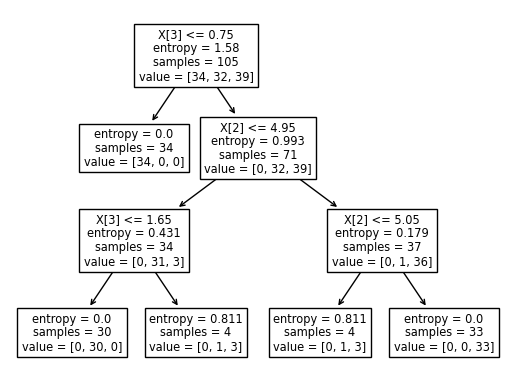

In [82]:
from sklearn import tree
tree.plot_tree(model)
plt.show()

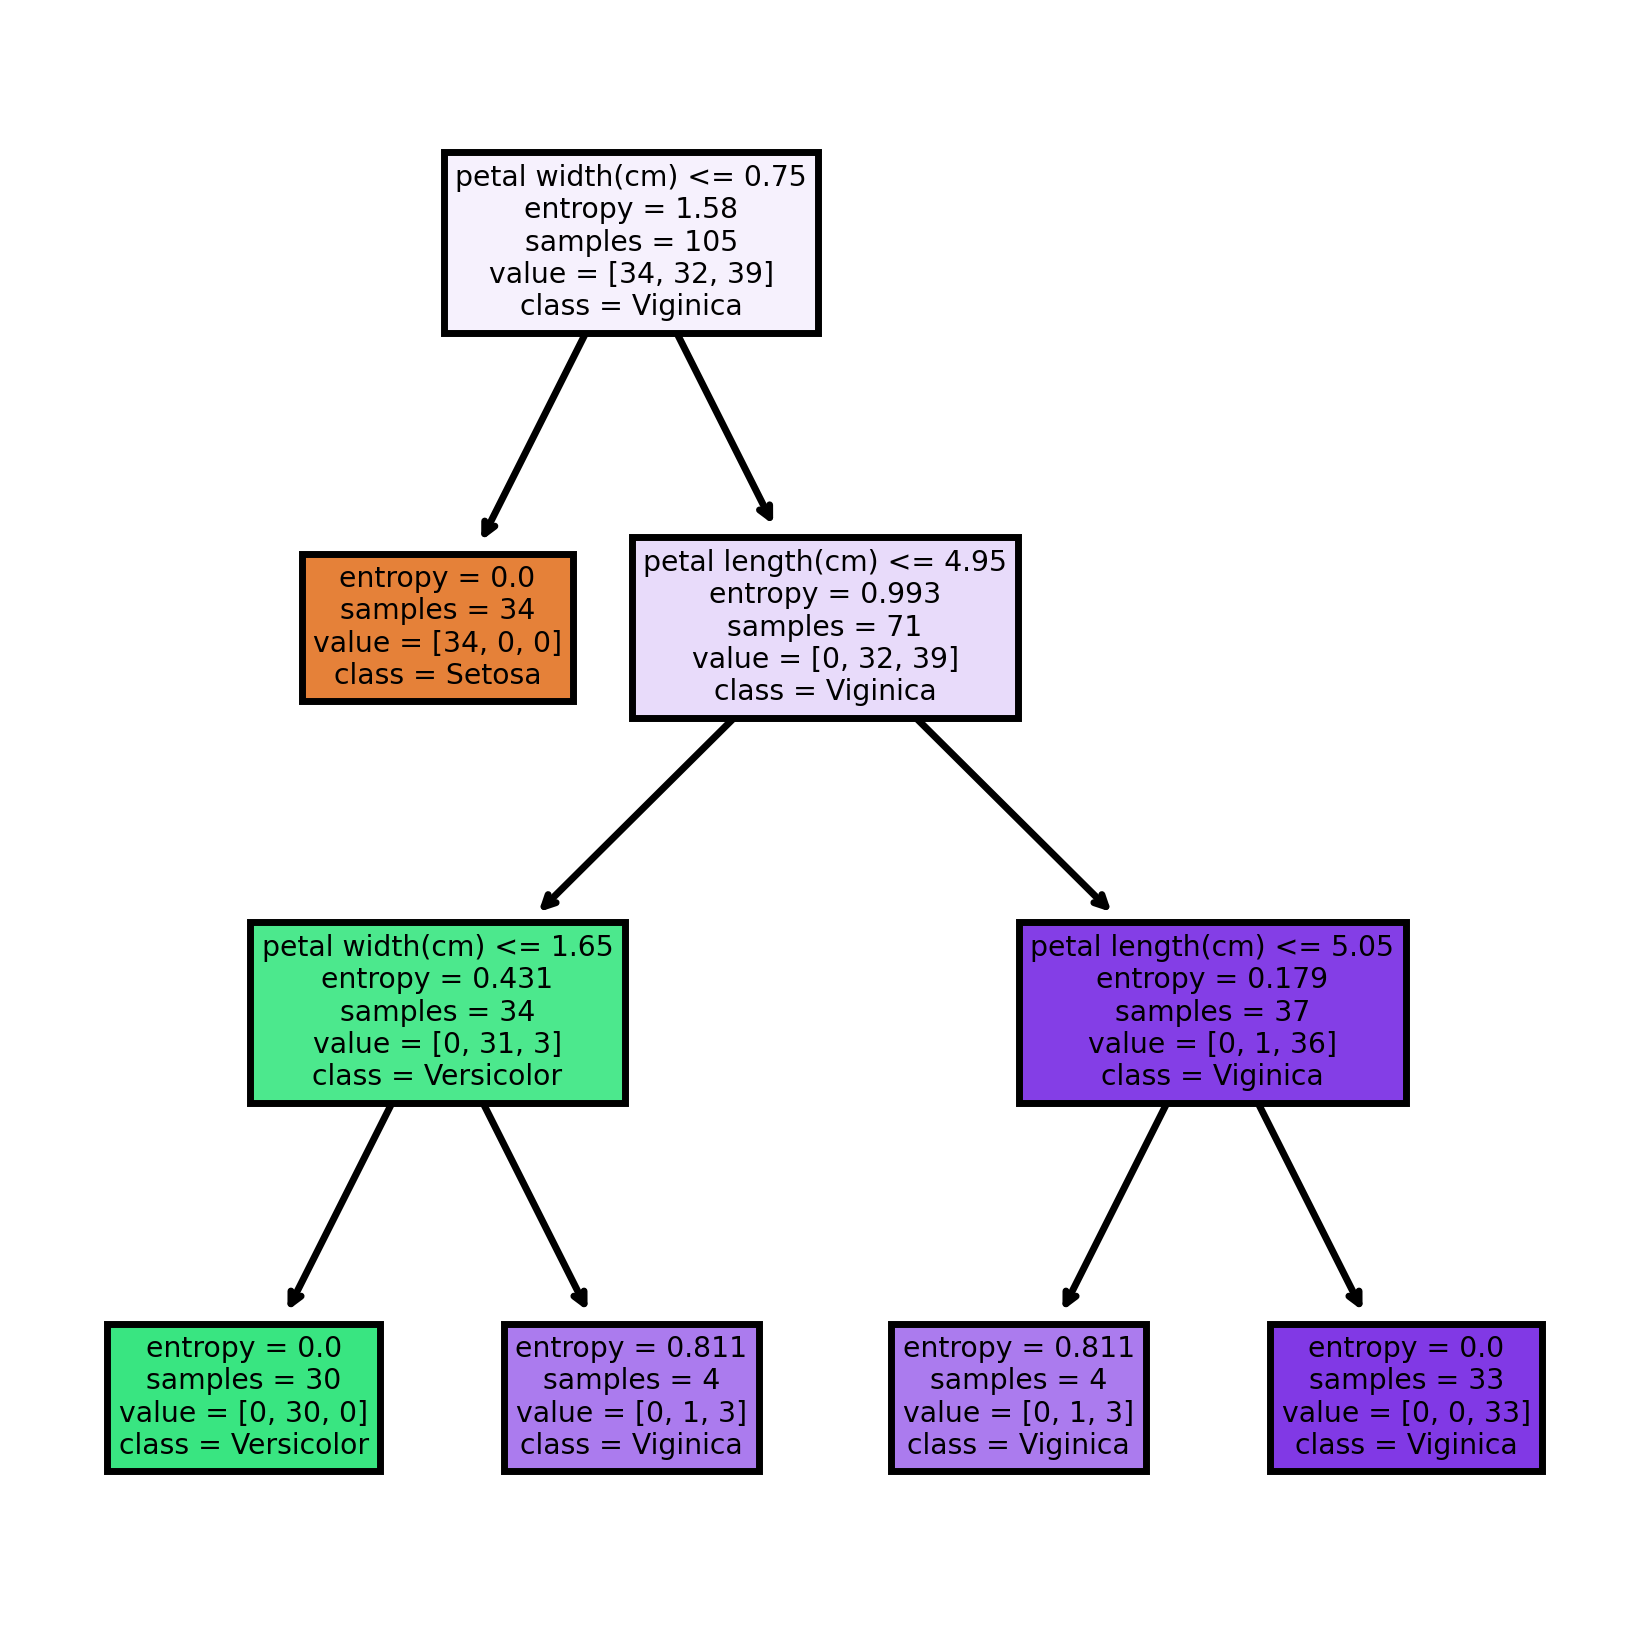

In [83]:
fn = ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn = ['Setosa','Versicolor','Viginica']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=500)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()